In [35]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Model, sequential
from keras.layers import Dense, Input, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from keras import backend as k
from keras.utils import np_utils
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator



In [69]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [70]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  inpx = (1, img_rows, img_cols)

else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

x_train.shape

(60000, 28, 28, 1)

In [71]:
import tensorflow as tf
from keras import utils as np_utils 

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

Y_test = tf.keras.utils.to_categorical(y_test, 10)
Y_train = tf.keras.utils.to_categorical(y_train, 10)

y_train[0], Y_train[0]


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))

In [72]:
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)


In [73]:
from keras.engine.base_layer import Layer
from keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [74]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_15 (Activation)   (None, 10, 10, 64)       

In [87]:
#Adadelta Optimizer
import tensorflow as tf
from keras.optimizer_v2 import optimizer_v2
model = Model([inpx], layer7)
model.compile(optimizer=tf.keras.optimizers.Adadelta(),
			loss=keras.losses.categorical_crossentropy,
			metrics=['accuracy'])

r=model.fit(x_train, y_train, epochs=12, batch_size=500)


Epoch 1/12
120/120 [==============================] - 134s 1s/step - loss: 2.2175 - accuracy: 0.3051
Epoch 2/12
120/120 [==============================] - 134s 1s/step - loss: 2.2077 - accuracy: 0.3434
Epoch 3/12
120/120 [==============================] - 134s 1s/step - loss: 2.1975 - accuracy: 0.3785
Epoch 4/12
120/120 [==============================] - 135s 1s/step - loss: 2.1876 - accuracy: 0.4098
Epoch 5/12
120/120 [==============================] - 135s 1s/step - loss: 2.1776 - accuracy: 0.4343
Epoch 6/12
120/120 [==============================] - 134s 1s/step - loss: 2.1678 - accuracy: 0.4550
Epoch 7/12
120/120 [==============================] - 134s 1s/step - loss: 2.1578 - accuracy: 0.4683
Epoch 8/12
120/120 [==============================] - 134s 1s/step - loss: 2.1478 - accuracy: 0.4785
Epoch 9/12
120/120 [==============================] - 134s 1s/step - loss: 2.1373 - accuracy: 0.4882
Epoch 10/12
120/120 [==============================] - 135s 1s/step - loss: 2.1268 - accura

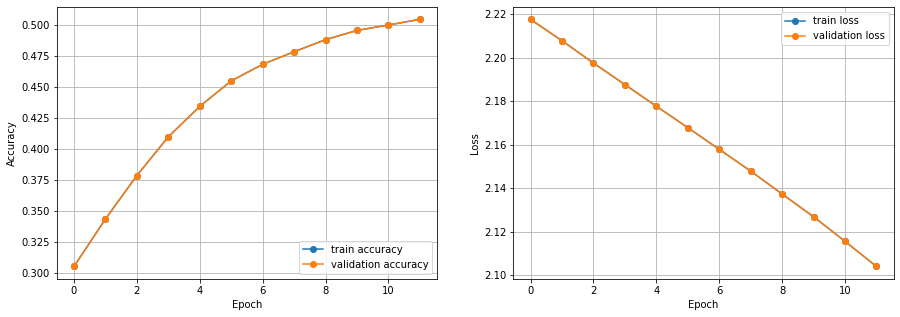

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(r.history['accuracy'], 'o-', label='train accuracy')
plt.plot(r.history['accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(r.history['loss'], 'o-', label='train loss')
plt.plot(r.history['loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [77]:
import tensorflow as tf
from keras.optimizer_v2 import optimizer_v2

In [95]:
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()
Xtrain, Xtest = Xtrain.reshape(Xtrain.shape[0], 28, 28, 1).astype('float32') / 255, Xtest.reshape(Xtest.shape[0], 28, 28, 1).astype('float32')/255

 **Model - Sequential 1**

In [89]:
model = tf.keras.Sequential([
	tf.keras.Input(shape=(28, 28, 1)),
	tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
	tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
	tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
	tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(units=64, activation='relu'),
	tf.keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

Adam Optimizer Algorithm

In [91]:
model.compile(
	optimizer = tf.keras.optimizers.Adam(),
	loss = tf.keras.losses.sparse_categorical_crossentropy,
	metrics = ['accuracy']
)


In [97]:
r = model.fit(x=Xtrain, y=Ytrain, epochs=10, validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0502 - accuracy: 0.0988 - val_loss: 0.0641 - val_accuracy: 0.0994
Epoch 2/10
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0375 - accuracy: 0.0990 - val_loss: 0.0465 - val_accuracy: 0.0997
Epoch 3/10
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0282 - accuracy: 0.0987 - val_loss: 0.0452 - val_accuracy: 0.1003
Epoch 4/10
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0227 - accuracy: 0.0987 - val_loss: 0.0479 - val_accuracy: 0.0981
Epoch 5/10
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0173 - accuracy: 0.0986 - val_loss: 0.0532 - val_accuracy: 0.0992
Epoch 6/10
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0156 - accuracy: 0.0987 - val_loss: 0.0589 - val_accuracy: 0.0965
Epoch 7/10
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0132 - accuracy: 0.0987 - val_loss: 0.0503 -

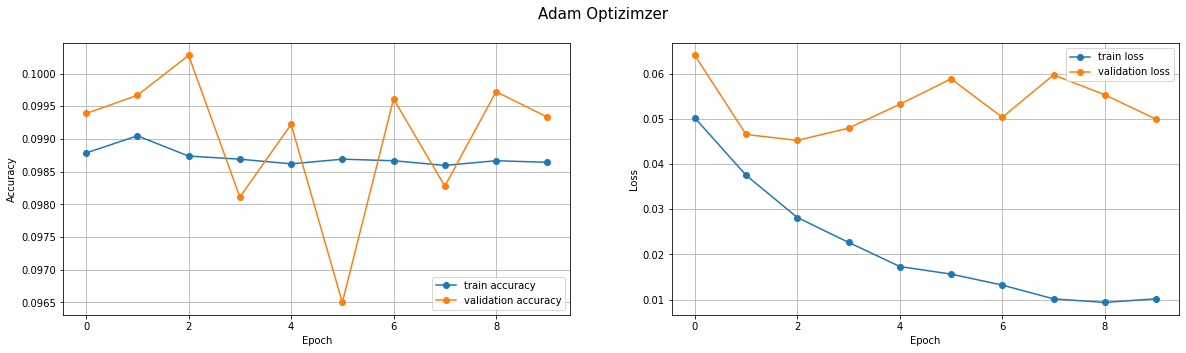

In [102]:
plt.figure(figsize=(20,5))
plt.suptitle('Adam Optizimzer', fontsize = 15)
plt.subplot(1,2,1)
plt.plot(r.history['accuracy'], 'o-', label = 'train accuracy')
plt.plot(r.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(r.history['loss'], 'o-', label = 'train loss')
plt.plot(r.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

**SGD Optimizer**

In [104]:
model.compile(
	optimizer = tf.keras.optimizers.SGD(),
	loss = tf.keras.losses.sparse_categorical_crossentropy,
	metrics = ['accuracy']
)

h = model.fit(x=Xtrain, y=Ytrain, epochs=10, validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0454 - val_accuracy: 0.9901
Epoch 2/10
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0453 - val_accuracy: 0.9903
Epoch 3/10
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0453 - val_accuracy: 0.9902
Epoch 4/10
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0456 - val_accuracy: 0.9902
Epoch 5/10
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0457 - val_accuracy: 0.9903
Epoch 6/10
1313/1313 [==============================] - 30s 23ms/step - loss: 9.8099e-04 - accuracy: 0.9998 - val_loss: 0.0460 - val_accuracy: 0.9905
Epoch 7/10
1313/1313 [==============================] - 30s 23ms/step - loss: 8.5455e-04 - accuracy: 0.9999 - val_loss: 

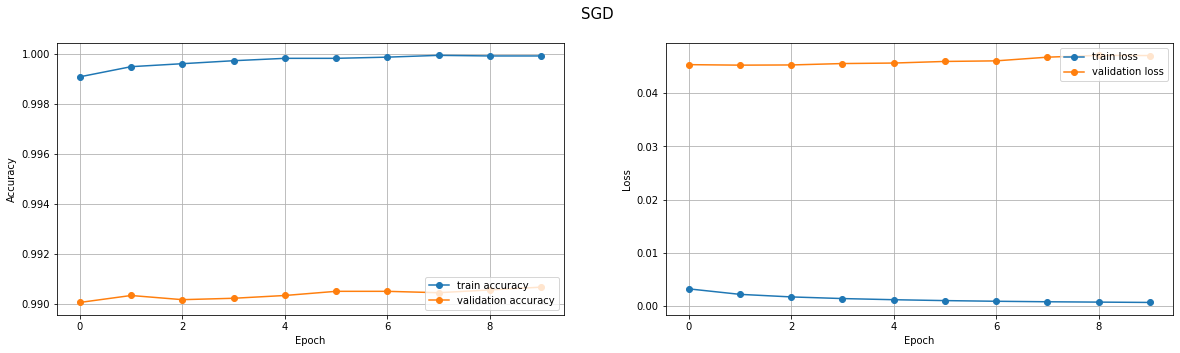

In [106]:
plt.figure(figsize=(20,5))
plt.suptitle('SGD', fontsize = 15)
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label = 'train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label = 'train loss')
plt.plot(h.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()